In [1]:
%load_ext autoreload
%autoreload 2

from constants_and_utils import *

from generate_personas import *
from generate_networks import *
from analyze_networks import *
from plotting import *
from network_datasets import *

import matplotlib.pyplot as plt

# Analyze networks

In [2]:
network_df = pd.read_csv(f'stats/real/network_metrics.csv')
metric_dfs = [network_df]
homophily_dfs = []

# load network metrics and homophily for generated networks
model = 'gpt-3.5-turbo'
for method in ['global', 'local', 'sequential']:
    metric_dfs.append(pd.read_csv(f'stats/{method}_{model}/network_metrics.csv'))
    homophily_dfs.append(pd.read_csv(f'stats/{method}_{model}/homophily.csv'))
for extension in ['_ALL_SHUFFLED', '_w_interests', '_only_interests', '_temp06', '_temp10', '_prompt_all', '_w_reason']:
    metric_dfs.append(pd.read_csv(f'stats/sequential_{model}{extension}/network_metrics.csv'))
    homophily_dfs.append(pd.read_csv(f'stats/sequential_{model}{extension}/homophily.csv'))
    
model = 'gpt-4o'
for extension in ['', '_prompt_all', '_n5', '_n5_prompt_all']:
    metric_dfs.append(pd.read_csv(f'stats/sequential_{model}{extension}/network_metrics.csv'))
    homophily_dfs.append(pd.read_csv(f'stats/sequential_{model}{extension}/homophily.csv'))

model = 'llama3.1-8b'
for extension in ['', '_n5']:
    metric_dfs.append(pd.read_csv(f'stats/sequential_{model}{extension}/network_metrics.csv'))
    homophily_dfs.append(pd.read_csv(f'stats/sequential_{model}{extension}/homophily.csv'))

model = 'llama3.1-70b'
for extension in ['', '_n5']:
    metric_dfs.append(pd.read_csv(f'stats/sequential_{model}{extension}/network_metrics.csv'))
    homophily_dfs.append(pd.read_csv(f'stats/sequential_{model}{extension}/homophily.csv'))

model = 'gemma2-9b'
for extension in ['']:
    metric_dfs.append(pd.read_csv(f'stats/sequential_{model}{extension}/network_metrics.csv'))
    homophily_dfs.append(pd.read_csv(f'stats/sequential_{model}{extension}/homophily.csv'))

model = 'gemma2-27b'
for extension in ['', '_n5']:
    metric_dfs.append(pd.read_csv(f'stats/sequential_{model}{extension}/network_metrics.csv'))
    homophily_dfs.append(pd.read_csv(f'stats/sequential_{model}{extension}/homophily.csv'))

network_df = pd.concat(metric_dfs)
print(network_df.groupby('save_name').size())

save_name
global_gpt-3.5-turbo                       4710
local_gpt-3.5-turbo                        4710
real                                       1097
sequential_gemma2-27b                      1570
sequential_gemma2-27b_n5                   1570
sequential_gemma2-9b                       1570
sequential_gpt-3.5-turbo                   4710
sequential_gpt-3.5-turbo_ALL_SHUFFLED      1570
sequential_gpt-3.5-turbo_only_interests    4710
sequential_gpt-3.5-turbo_prompt_all        1570
sequential_gpt-3.5-turbo_temp06            4710
sequential_gpt-3.5-turbo_temp10            4710
sequential_gpt-3.5-turbo_w_interests       4710
sequential_gpt-3.5-turbo_w_reason          1570
sequential_gpt-4o                          4710
sequential_gpt-4o_n5                       1570
sequential_gpt-4o_n5_prompt_all            1570
sequential_gpt-4o_prompt_all               1570
sequential_llama3.1-70b                    1570
sequential_llama3.1-70b_n5                 1570
sequential_llama3.1-8b        

In [3]:
homophily_df = pd.concat(homophily_dfs)
print(homophily_df.groupby('save_name').size())

save_name
global_gpt-3.5-turbo                       300
local_gpt-3.5-turbo                        300
sequential_gemma2-27b                      100
sequential_gemma2-27b_n5                   100
sequential_gemma2-9b                       100
sequential_gpt-3.5-turbo                   300
sequential_gpt-3.5-turbo_ALL_SHUFFLED      100
sequential_gpt-3.5-turbo_only_interests    300
sequential_gpt-3.5-turbo_prompt_all        100
sequential_gpt-3.5-turbo_temp06            300
sequential_gpt-3.5-turbo_temp10            300
sequential_gpt-3.5-turbo_w_interests       300
sequential_gpt-3.5-turbo_w_reason          100
sequential_gpt-4o                          300
sequential_gpt-4o_n5                       100
sequential_gpt-4o_n5_prompt_all            100
sequential_gpt-4o_prompt_all               100
sequential_llama3.1-70b                    100
sequential_llama3.1-70b_n5                 100
sequential_llama3.1-8b                     100
sequential_llama3.1-8b_n5                  100
dty

In [4]:
def rename_network_metrics(n):
    if n == 'prop_nodes_lcc':
        return 'Prop nodes LCC'
    n = n.split('_')
    n = ' '.join(n)
    return n.capitalize()

for n in network_df['metric_name'].unique():
    print(n, rename_network_metrics(n))
    
network_df['metric_name'] = network_df['metric_name'].apply(rename_network_metrics)
network_df.head()

density Density
avg_clustering_coef Avg clustering coef
prop_nodes_lcc Prop nodes LCC
radius Radius
diameter Diameter
avg_shortest_path Avg shortest path
modularity Modularity
degree_centrality Degree centrality
betweenness_centrality Betweenness centrality
closeness_centrality Closeness centrality


,graph_nr,metric_name,_metric_value,save_name,node
0,0.0,Density,0.144444,real,NaN
1,0.0,Avg clustering coef,0.415549,real,NaN
2,0.0,Prop nodes LCC,0.916667,real,NaN
3,0.0,Radius,0.857999,real,NaN
4,0.0,Diameter,1.429998,real,NaN


In [6]:
# GPT 3.5
x_to_keep = ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity']
network_df[network_df['metric_name'].isin(x_to_keep) & network_df.save_name.str.contains('gpt-3.5')].groupby(['save_name', 'metric_name'])['_metric_value'].agg(['count', 'mean', 'sem']).round(3)

count   mean  \
save_name                               metric_name                         
global_gpt-3.5-turbo                    Avg clustering coef     30  0.071   
                                        Avg shortest path       30  1.456   
                                        Density                 30  0.037   
                                        Modularity              30  0.763   
                                        Prop nodes LCC          30  0.501   
local_gpt-3.5-turbo                     Avg clustering coef     30  0.455   
                                        Avg shortest path       30  0.587   
                                        Density                 30  0.172   
                                        Modularity              30  0.419   
                                        Prop nodes LCC          30  1.000   
sequential_gpt-3.5-turbo                Avg clustering coef     30  0.495   
                                        Avg shortest path       30  0.561   
                                        Density                 30  0.149   
                                        Modularity              30  0.365   
                                        Prop nodes LCC          30  1.000   
sequential_gpt-3.5-turbo_ALL_SHUFFLED   Avg clustering coef     10  0.510   
                                        Avg shortest path       10  0.543   
                                        Density                 10  0.160   
                                        Modularity              10  0.342   
                                        Prop nodes LCC          10  1.000   
sequential_gpt-3.5-turbo_only_interests Avg clustering coef     30  0.553   
                                        Avg shortest path       30  0.493   
                                        Density                 30  0.193   
                                        Modularity              30  0.215   
                                        Prop nodes LCC          30  1.000   
sequential_gpt-3.5-turbo_prompt_all     Avg clustering coef     10  0.467   
                                        Avg shortest path       10  0.560   
                                        Density                 10  0.148   
                                        Modularity              10  0.377   
                                        Prop nodes LCC          10  1.000   
sequential_gpt-3.5-turbo_temp06         Avg clustering coef     30  0.528   
                                        Avg shortest path       30  0.565   
                                        Density                 30  0.146   
                                        Modularity              30  0.371   
                                        Prop nodes LCC          30  1.000   
sequential_gpt-3.5-turbo_temp10         Avg clustering coef     30  0.431   
                                        Avg shortest path       30  0.558   
                                        Density                 30  0.146   
                                        Modularity              30  0.347   
                                        Prop nodes LCC          30  1.000   
sequential_gpt-3.5-turbo_w_interests    Avg clustering coef     30  0.456   
                                        Avg shortest path       30  0.591   
                                        Density                 30  0.140   
                                        Modularity              30  0.412   
                                        Prop nodes LCC          30  1.000   
sequential_gpt-3.5-turbo_w_reason       Avg clustering coef     10  0.476   
                                        Avg shortest path       10  0.579   
                                        Density                 10  0.136   
                                        Modularity              10  0.364   
                                        Prop nodes LCC          10  1.000   

                                                        

In [7]:
# non-GPT 3.5 
network_df[network_df['metric_name'].isin(x_to_keep) & ~network_df.save_name.str.contains('gpt-3.5')].groupby(['save_name', 'metric_name'])['_metric_value'].agg(['count', 'mean', 'sem']).round(3)

count   mean    sem
save_name                       metric_name                             
real                            Avg clustering coef      8  0.454  0.043
                                Avg shortest path        8  0.635  0.047
                                Density                  8  0.197  0.046
                                Modularity               8  0.378  0.050
                                Prop nodes LCC           8  0.990  0.010
sequential_gemma2-27b           Avg clustering coef     10  0.791  0.008
                                Avg shortest path       10  0.510  0.010
                                Density                 10  0.360  0.005
                                Modularity              10  0.473  0.004
                                Prop nodes LCC          10  1.000  0.000
sequential_gemma2-27b_n5        Avg clustering coef     10  0.580  0.018
                                Avg shortest path       10  0.647  0.025
                                Density                 10  0.171  0.008
                                Modularity              10  0.471  0.006
                                Prop nodes LCC          10  0.952  0.048
sequential_gemma2-9b            Avg clustering coef     10  0.741  0.015
                                Avg shortest path       10  0.476  0.006
                                Density                 10  0.350  0.007
                                Modularity              10  0.450  0.006
                                Prop nodes LCC          10  1.000  0.000
sequential_gpt-4o               Avg clustering coef     30  0.871  0.005
                                Avg shortest path       30  0.432  0.013
                                Density                 30  0.376  0.004
                                Modularity              30  0.492  0.002
                                Prop nodes LCC          30  0.584  0.030
sequential_gpt-4o_n5            Avg clustering coef     10  0.581  0.015
                                Avg shortest path       10  0.603  0.046
                                Density                 10  0.173  0.008
                                Modularity              10  0.488  0.006
                                Prop nodes LCC          10  0.616  0.064
sequential_gpt-4o_n5_prompt_all Avg clustering coef     10  0.542  0.007
                                Avg shortest path       10  0.576  0.027
                                Density                 10  0.169  0.004
                                Modularity              10  0.501  0.004
                                Prop nodes LCC          10  0.568  0.048
sequential_gpt-4o_prompt_all    Avg clustering coef     10  0.802  0.010
                                Avg shortest path       10  0.521  0.039
                                Density                 10  0.310  0.006
                                Modularity              10  0.483  0.009
                                Prop nodes LCC          10  0.666  0.073
sequential_llama3.1-70b         Avg clustering coef     10  0.726  0.013
                                Avg shortest path       10  0.561  0.041
                                Density                 10  0.291  0.008
                                Modularity              10  0.489  0.004
                                Prop nodes LCC          10  0.808  0.078
sequential_llama3.1-70b_n5      Avg clustering coef     10  0.579  0.015
                                Avg shortest path       10  0.598  0.031
                                Density                 10  0.170  0.007
                                Modularity              10  0.482  0.007
                                Prop nodes LCC          10  0.712  0.078
sequential_llama3.1-8b          Avg clustering coef     10  0.627  0.011
                                Avg shortest path       10  0.446  0.005
                                Density                 10  0.346  0.008
                                Modula

Dropping node-level stats: kept 686 out of 15227 rows
Keeping rows in ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity']: kept 490 out of 686 rows


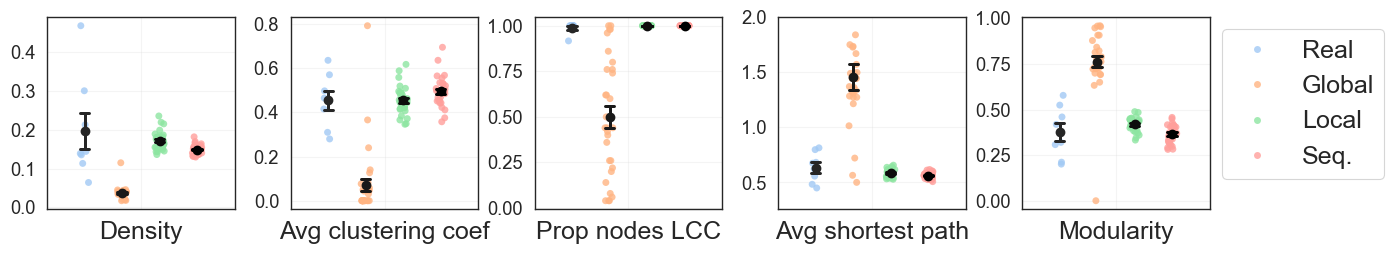

In [11]:
# main results - GPT 3.5 metrics, separate plots
to_keep = ['real', 'global_gpt-3.5-turbo', 'local_gpt-3.5-turbo', 'sequential_gpt-3.5-turbo']
kept_df = network_df[network_df.save_name.isin(to_keep)]
plot_metrics_separately(kept_df, save_name=None, plot_type='default', x_to_keep=x_to_keep, 
                            simplify_legend=True, legend_mapper=None)

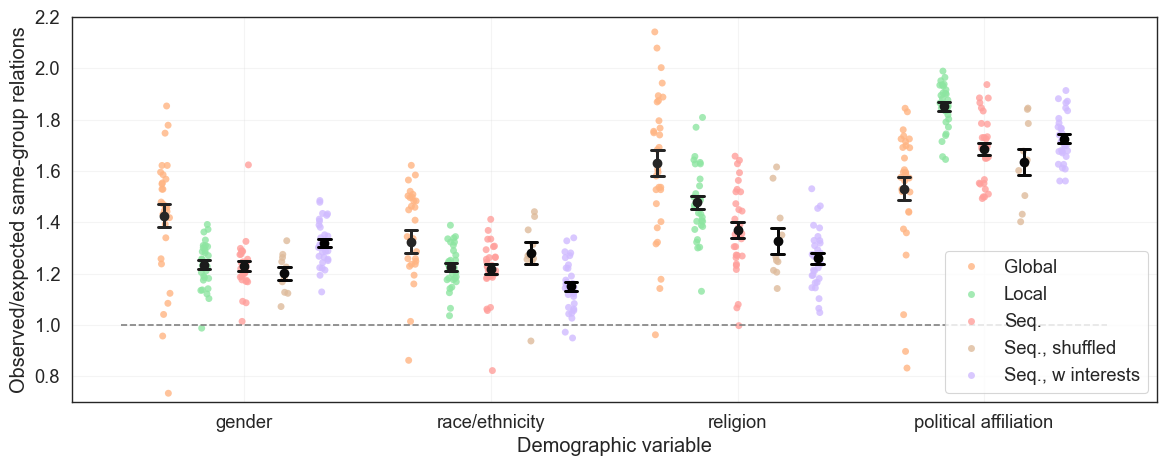

In [43]:
# GPT 3.5 - main results on homophily
to_keep = ['global_gpt-3.5-turbo', 'local_gpt-3.5-turbo', 'sequential_gpt-3.5-turbo', 'sequential_gpt-3.5-turbo_ALL_SHUFFLED', 'sequential_gpt-3.5-turbo_w_interests']
kept_df = homophily_df[homophily_df.save_name.isin(to_keep) & (homophily_df['demo'] != 'age')]
make_plot(kept_df, plot_homophily=True, plot_type='default', y_lim=(0.7, 2.2), figsize=(14, 5), save_name='homophily_gpt3-5.pdf', dodge=0.65)

Dropping node-level stats: kept 546 out of 12087 rows
Keeping rows in ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity']: kept 390 out of 546 rows


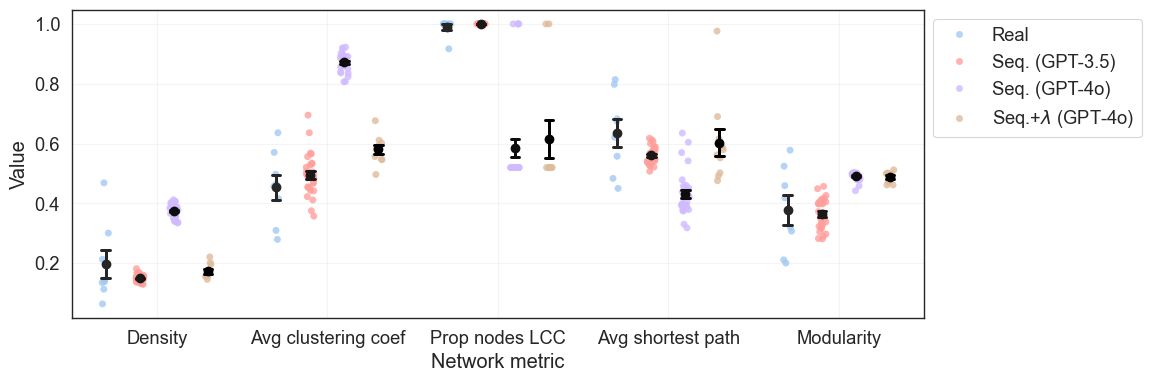

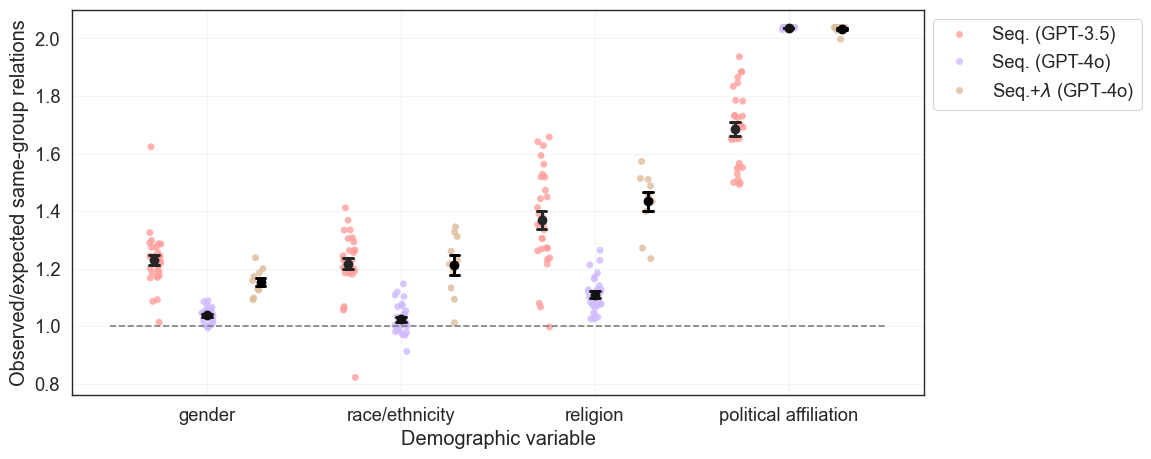

In [22]:
# compare GPT 3.5 vs GPT 4o
to_keep = ['real', 'sequential_gpt-3.5-turbo', 'sequential_gpt-4o', 'sequential_gpt-4o_n5']
kept_df = network_df[network_df.save_name.isin(to_keep)]
legend_mapper = {'real': 'Real',
                 'sequential_gpt-3.5-turbo': 'Seq. (GPT-3.5)',
                 'sequential_gpt-4o': 'Seq. (GPT-4o)',
                 'sequential_gpt-4o_n5': 'Seq.+$\lambda$ (GPT-4o)'}
pastel_palette = sns.color_palette("pastel")
colors = {'real': pastel_palette[0],
          'sequential_gpt-3.5-turbo': pastel_palette[3],
          'sequential_gpt-4o': pastel_palette[4],
          'sequential_gpt-4o_n5': pastel_palette[5]}
make_plot(kept_df, plot_homophily=False, plot_type='default', legend_mapper=legend_mapper, palette=colors,
          x_to_keep=x_to_keep, save_name='metrics_gpt4o.pdf', figsize=(11, 4), legend_pos=(1,1))

to_keep.remove('real')
kept_df = homophily_df[homophily_df.save_name.isin(to_keep) & (homophily_df['demo'] != 'age')]
make_plot(kept_df, plot_homophily=True, plot_type='default', legend_mapper=legend_mapper, palette=colors, 
          save_name='homophily_gpt4o.pdf', dodge=0.55, figsize=(11, 5), legend_pos=(1,1))

Dropping node-level stats: kept 546 out of 12087 rows
Keeping rows in ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity']: kept 390 out of 546 rows


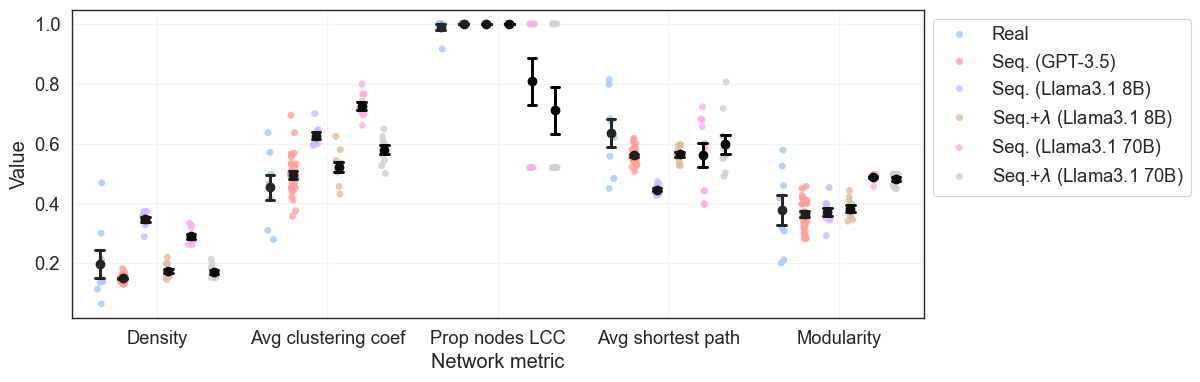

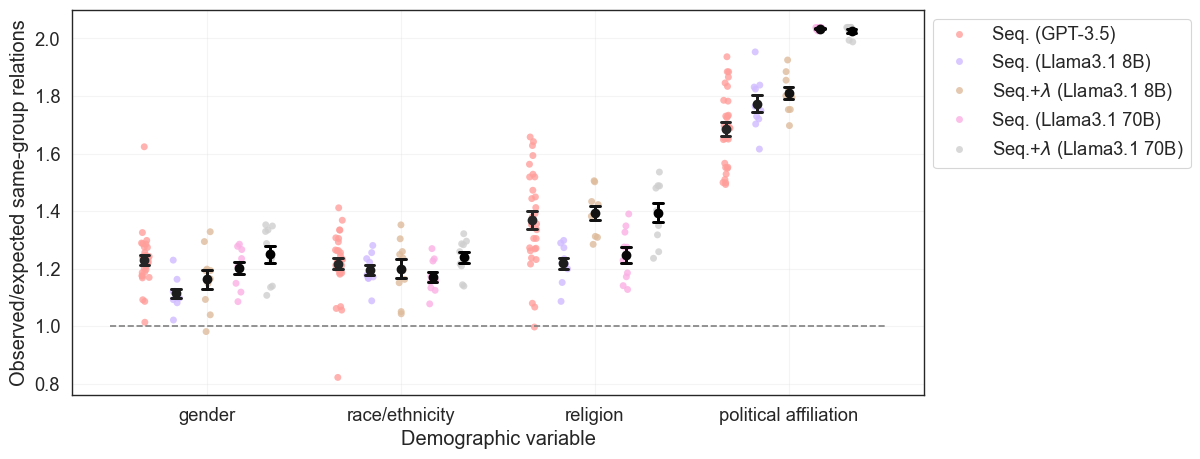

In [28]:
# compare GPT 3.5 vs Llama
to_keep = ['real', 'sequential_gpt-3.5-turbo', 'sequential_llama3.1-8b', 'sequential_llama3.1-8b_n5', 'sequential_llama3.1-70b', 'sequential_llama3.1-70b_n5']
kept_df = network_df[network_df.save_name.isin(to_keep)]
legend_mapper = {'real': 'Real', 
                 'sequential_gpt-3.5-turbo': 'Seq. (GPT-3.5)',
                 'sequential_llama3.1-8b': 'Seq. (Llama3.1 8B)',
                 'sequential_llama3.1-8b_n5': 'Seq.+$\lambda$ (Llama3.1 8B)',
                 'sequential_llama3.1-70b': 'Seq. (Llama3.1 70B)',
                 'sequential_llama3.1-70b_n5': 'Seq.+$\lambda$ (Llama3.1 70B)'}
colors = {'real': pastel_palette[0], 
                 'sequential_gpt-3.5-turbo': pastel_palette[3],
                 'sequential_llama3.1-8b': pastel_palette[4],
                 'sequential_llama3.1-8b_n5': pastel_palette[5],
                 'sequential_llama3.1-70b': pastel_palette[6],
                 'sequential_llama3.1-70b_n5': pastel_palette[7]}

make_plot(kept_df, plot_homophily=False, plot_type='default', legend_mapper=legend_mapper, palette=colors,
          x_to_keep=x_to_keep, save_name='metrics_llama.pdf', figsize=(11, 4), legend_pos=(1,1), dodge=0.67)

to_keep.remove('real')
kept_df = homophily_df[homophily_df.save_name.isin(to_keep) & (homophily_df['demo'] != 'age')]
make_plot(kept_df, plot_homophily=True, plot_type='default', legend_mapper=legend_mapper, palette=colors, 
          save_name='homophily_llama.pdf', dodge=0.65, figsize=(11, 5), legend_pos=(1,1))

Dropping node-level stats: kept 476 out of 10517 rows
Keeping rows in ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity']: kept 340 out of 476 rows


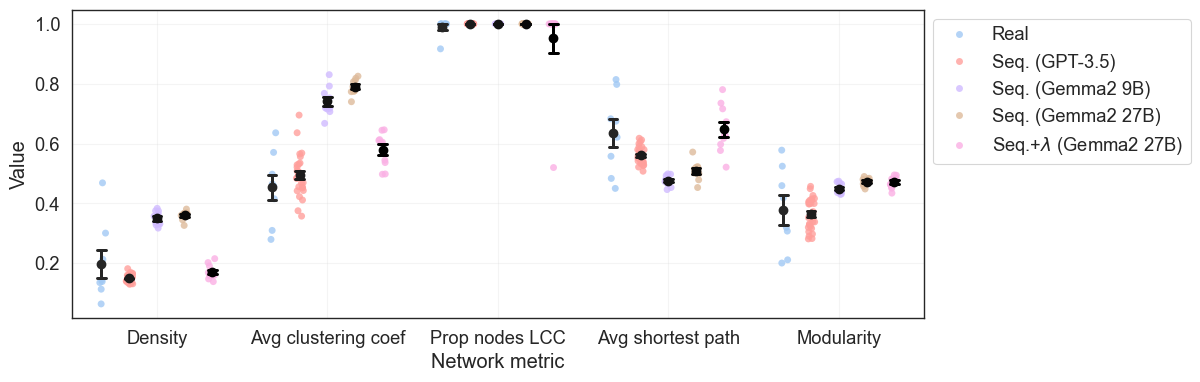

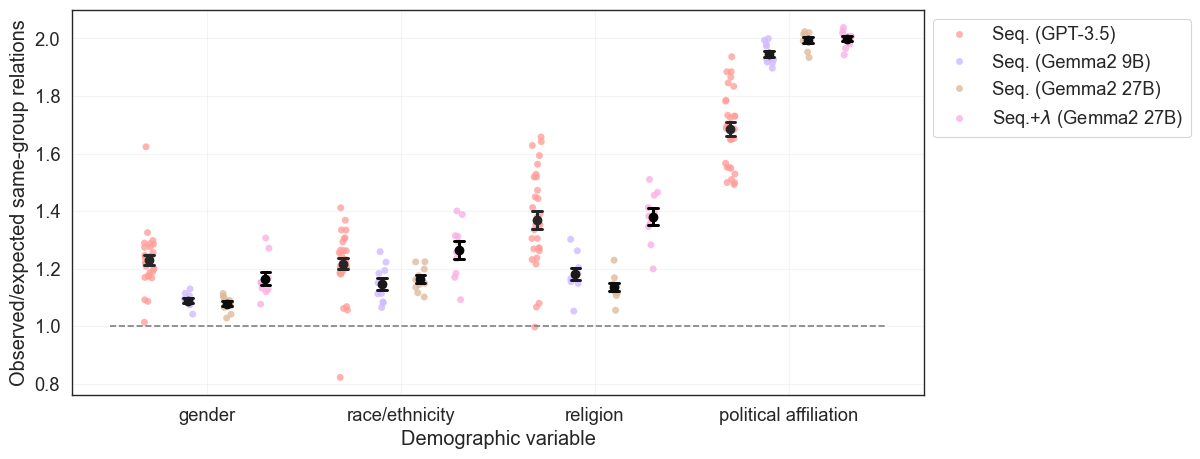

In [29]:
# compare GPT 3.5 vs Gemma
to_keep = ['real', 'sequential_gpt-3.5-turbo', 'sequential_gemma2-9b', 'sequential_gemma2-27b', 'sequential_gemma2-27b_n5']
kept_df = network_df[network_df.save_name.isin(to_keep)]
legend_mapper = {'real': 'Real', 
                 'sequential_gpt-3.5-turbo': 'Seq. (GPT-3.5)',
                 'sequential_gemma2-9b': 'Seq. (Gemma2 9B)',
                 'sequential_gemma2-27b': 'Seq. (Gemma2 27B)',
                 'sequential_gemma2-27b_n5': 'Seq.+$\lambda$ (Gemma2 27B)'}
colors = {'real': pastel_palette[0], 
                 'sequential_gpt-3.5-turbo': pastel_palette[3], 
                 'sequential_gemma2-9b': pastel_palette[4], 
                 'sequential_gemma2-27b': pastel_palette[5], 
                 'sequential_gemma2-27b_n5': pastel_palette[6]}
make_plot(kept_df, plot_homophily=False, plot_type='default', legend_mapper=legend_mapper, palette=colors,
          x_to_keep=x_to_keep, save_name='metrics_gemma.pdf', figsize=(11, 4), legend_pos=(1,1), dodge=0.65) # , y_lim=(-0.1, 1.9))

to_keep.remove('real')
kept_df = homophily_df[homophily_df.save_name.isin(to_keep) & (homophily_df['demo'] != 'age')]
make_plot(kept_df, plot_homophily=True, plot_type='default', legend_mapper=legend_mapper, palette=colors,
          save_name='homophily_gemma.pdf', figsize=(11, 5), dodge=0.6, legend_pos=(1,1))

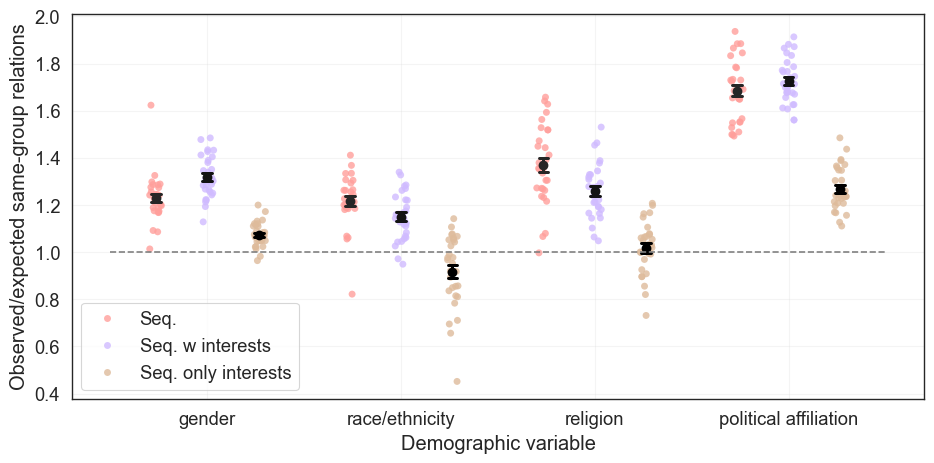

In [42]:
# homophily with interests
to_keep = ['sequential_gpt-3.5-turbo', 'sequential_gpt-3.5-turbo_w_interests', 'sequential_gpt-3.5-turbo_only_interests']
legend_mapper = {'sequential_gpt-3.5-turbo': 'Seq.',
                 'sequential_gpt-3.5-turbo_w_interests': 'Seq. w interests',
                 'sequential_gpt-3.5-turbo_only_interests': 'Seq. only interests'}
colors = {'sequential_gpt-3.5-turbo': pastel_palette[3],
                 'sequential_gpt-3.5-turbo_w_interests': pastel_palette[4],
                 'sequential_gpt-3.5-turbo_only_interests': pastel_palette[5]}
kept_df = homophily_df[homophily_df.save_name.isin(to_keep) & (homophily_df['demo'] != 'age')]
make_plot(kept_df, plot_homophily=True, plot_type='default', legend_mapper=legend_mapper, palette=colors,
          save_name='homophily_only_interests.pdf', figsize=(11, 5), dodge=0.53)

Dropping node-level stats: kept 686 out of 15227 rows
Keeping rows in ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity']: kept 490 out of 686 rows
setting legend pos


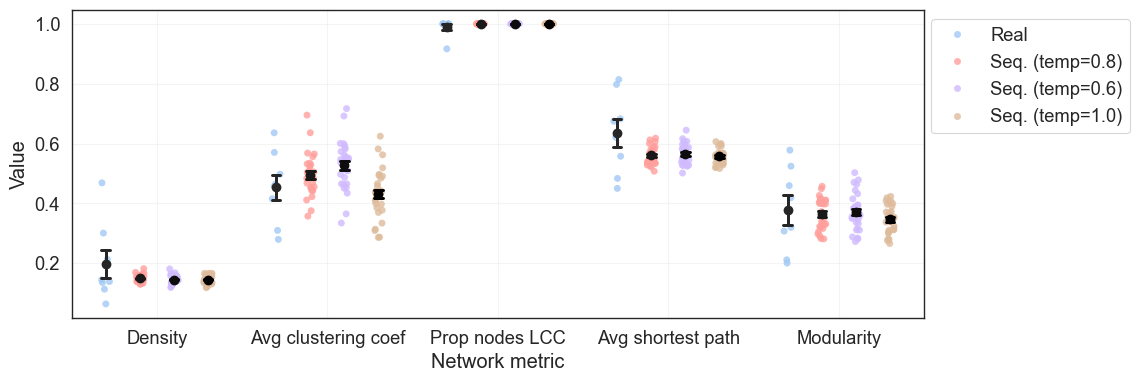

setting legend pos


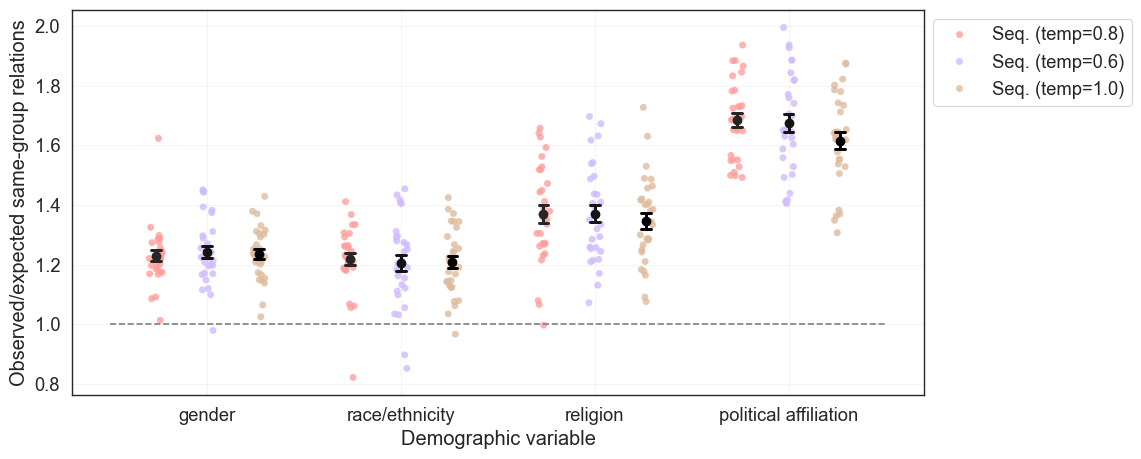

In [38]:
# compare across temperatures
to_keep = ['real', 'sequential_gpt-3.5-turbo', 'sequential_gpt-3.5-turbo_temp06', 'sequential_gpt-3.5-turbo_temp10']
legend_mapper = {'real': 'Real', 
                 'sequential_gpt-3.5-turbo': 'Seq. (temp=0.8)',
                 'sequential_gpt-3.5-turbo_temp06': 'Seq. (temp=0.6)',
                 'sequential_gpt-3.5-turbo_temp10': 'Seq. (temp=1.0)'}
colors = {'real': pastel_palette[0],
                 'sequential_gpt-3.5-turbo': pastel_palette[3],
                 'sequential_gpt-3.5-turbo_temp06': pastel_palette[4],
                 'sequential_gpt-3.5-turbo_temp10': pastel_palette[5],}
kept_df = network_df[network_df.save_name.isin(to_keep)]
make_plot(kept_df, plot_homophily=False, plot_type='default', legend_mapper=legend_mapper, palette=colors,
          x_to_keep=x_to_keep, save_name='metrics_temp.pdf', figsize=(11, 4), legend_pos=(1.252,1))

# compare different temperatures
to_keep.remove('real')
kept_df = homophily_df[homophily_df.save_name.isin(to_keep) & (homophily_df['demo'] != 'age')]
make_plot(kept_df, plot_homophily=True, plot_type='default', legend_mapper=legend_mapper, palette=colors,
          save_name='homophily_temp.pdf', figsize=(11, 5), legend_pos=(1,1), dodge=0.53)

Dropping node-level stats: kept 686 out of 15227 rows
Keeping rows in ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity']: kept 490 out of 686 rows
setting legend pos


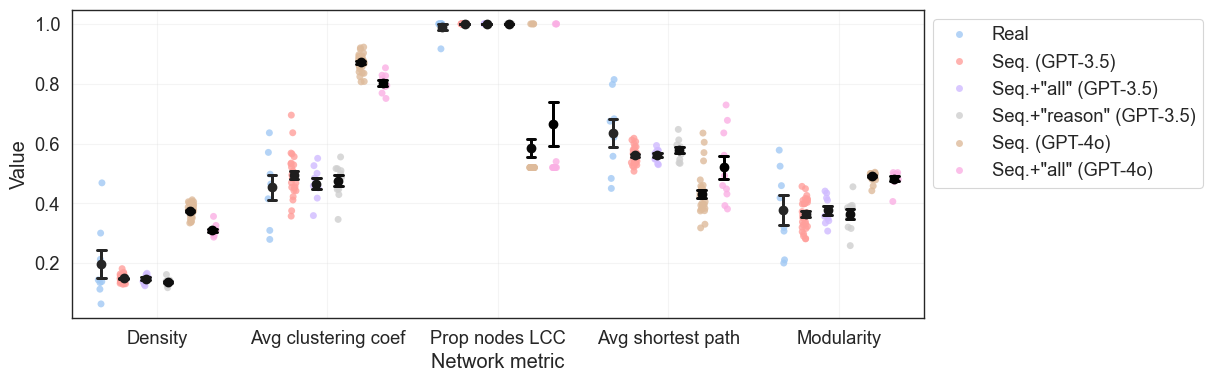

setting legend pos


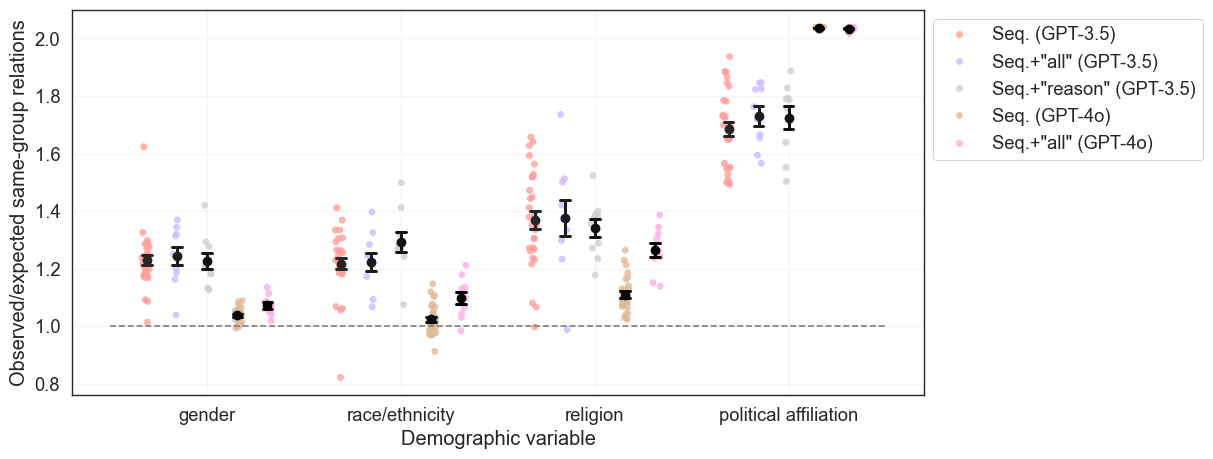

In [40]:
# testing "Pay all to all demographics"
to_keep = ['real', 'sequential_gpt-3.5-turbo', 'sequential_gpt-3.5-turbo_prompt_all', 'sequential_gpt-4o', 'sequential_gpt-4o_prompt_all', 'sequential_gpt-3.5-turbo_w_reason']
kept_df = network_df[network_df.save_name.isin(to_keep)]
legend_mapper = {'real': 'Real', 
                 'sequential_gpt-3.5-turbo': 'Seq. (GPT-3.5)',
                 'sequential_gpt-3.5-turbo_prompt_all': 'Seq.+"all" (GPT-3.5)',
                 'sequential_gpt-4o': 'Seq. (GPT-4o)',
                 'sequential_gpt-4o_prompt_all': 'Seq.+"all" (GPT-4o)',
                 'sequential_gpt-3.5-turbo_w_reason': 'Seq.+"reason" (GPT-3.5)'}
colors = {'real': pastel_palette[0],
                 'sequential_gpt-3.5-turbo': pastel_palette[3],
                 'sequential_gpt-3.5-turbo_prompt_all': pastel_palette[4],
                 'sequential_gpt-4o': pastel_palette[5],
                 'sequential_gpt-4o_prompt_all': pastel_palette[6],
                 'sequential_gpt-3.5-turbo_w_reason': pastel_palette[7]}
make_plot(kept_df, plot_homophily=False, plot_type='default', legend_mapper=legend_mapper, palette=colors,
          x_to_keep=x_to_keep, save_name='metrics_prompt_change.pdf', figsize=(11, 4), dodge=0.65)

to_keep.remove('real')
kept_df = homophily_df[homophily_df.save_name.isin(to_keep) & (homophily_df['demo'] != 'age')]
make_plot(kept_df, plot_homophily=True, plot_type='default', figsize=(11, 5), legend_mapper=legend_mapper, palette=colors,
          save_name='homophily_prompt_change.pdf', dodge=0.62, legend_pos=(1,1))

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
real 347 0.7666666666666666
global_gpt-3.5-turbo 1500 1.0
local_gpt-3.5-turbo 1500 0.5306122448979591
sequential_gpt-3.5-turbo 1500 0.6938775510204082


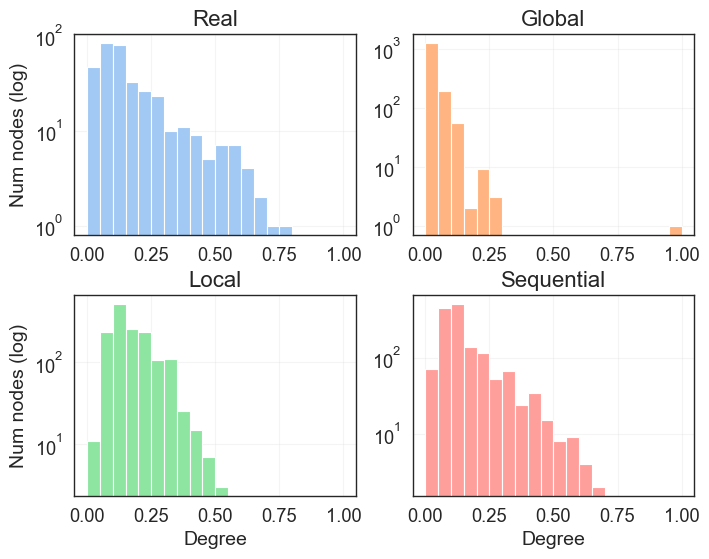

In [133]:
palette = get_pallete(kept_df)
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
fig.subplots_adjust(hspace=0.3)
bins = np.arange(0, 1.01, 0.05)
print(bins)

for i, ax in enumerate(axes.flatten()):
    name = to_keep[i]
    degrees = kept_df[(kept_df.save_name == name) & (kept_df.metric_name == 'Degree centrality')]['_metric_value'].values
    print(name, len(degrees), degrees.max())
    ax.hist(degrees, bins=bins, color=palette[name])
    ax.set_yscale('log')
    if i % 2 == 0:
        ax.set_ylabel('Num nodes (log)', fontsize=14)
    if i >= 2:
        ax.set_xlabel('Degree', fontsize=14)
    ax.set_title(get_short_name(name), fontsize=16)
    ax.grid(alpha=0.2)
plt.savefig('plots/degree_gpt3-5.pdf', bbox_inches='tight')

In [50]:
real_df = load_real_homophily(same_group=True)
real_df.sort_values('save_name').round(2)

,save_name,demo,_metric_value
4,gss-1985,gender,1.19
2,gss-1985,race/ethnicity,1.32
3,gss-1985,religion,1.63
7,gss-2004,gender,1.12
5,gss-2004,race/ethnicity,1.47
6,gss-2004,religion,2.08
0,laniado-friend,gender,1.04
1,laniado-interaction,gender,1.12
10,myspace,gender,0.96
8,myspace,race/ethnicity,1.96


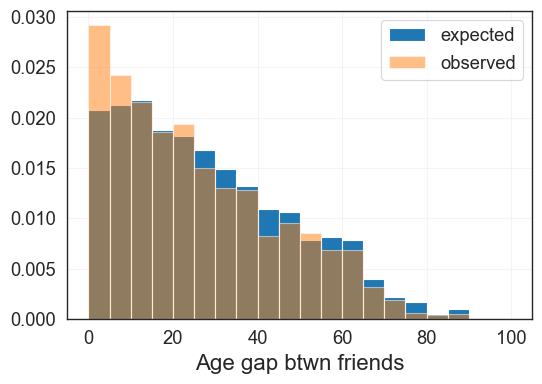

In [16]:
# age homophily
method = 'sequential'
model = 'gpt-3.5-turbo'
list_of_G = load_list_of_graphs(f'{method}_{model}', 0, 30, directed=False)
plot_expected_vs_observed_age_gaps(list_of_G, personas)
plt.savefig('plots/age_gap_dist.pdf', bbox_inches='tight')

In [84]:
def report_isolation_index(method, model):
    list_of_G = load_list_of_graphs(f'{method}_{model}', min_seed, max_seed+1, directed=False)
    print(f'{method}_{model}: found {len(list_of_G)} graphs')
    isolation = []
    exposure_c = []
    exposure_l = []
    for G in list_of_G:
        i, c, l = compute_isolation_index(G, personas)
        isolation.append(i)
        exposure_c.append(c)
        exposure_l.append(l)
    print(f'Isolation: {np.mean(isolation):0.3f}, {np.std(isolation)/np.sqrt(len(isolation)):0.3f}')
    print('Avg exposure, conservative:', np.mean(exposure_c), np.std(exposure_c)/np.sqrt(len(exposure_c)))
    print('Avg exposure, liberal:', np.mean(exposure_l), np.std(exposure_l)/np.sqrt(len(exposure_l)))

model = 'gpt-3.5-turbo'
for method in ['global', 'local', 'sequential']:
    print(method)
    report_isolation_index(method, model)
    print()


global
global_gpt-3.5-turbo: found 30 graphs
Isolation: nan, nan
Avg exposure, conservative: nan nan
Avg exposure, liberal: nan nan

local
local_gpt-3.5-turbo: found 30 graphs
Isolation: 0.729, 0.020
Avg exposure, conservative: 0.8542508142010917 0.012394073206182098
Avg exposure, liberal: 0.12565193596959534 0.008289944662901021

sequential
sequential_gpt-3.5-turbo: found 30 graphs
Isolation: 0.530, 0.027
Avg exposure, conservative: 0.7633748034707717 0.01609460581261149
Avg exposure, liberal: 0.23289352495389387 0.01325696136113265



/Users/serinachang/Documents/research/llm_social_network/git_src/analyze_networks.py:243: RuntimeWarning: invalid value encountered in divide
  share_conservative = num_neighbors_c / (num_neighbors_c + num_neighbors_l)


In [92]:
def report_polarization(method, model):
    list_of_G = load_list_of_graphs(f'{method}_{model}', min_seed, max_seed+1, directed=False)
    print(f'{method}_{model}: found {len(list_of_G)} graphs')
    pol = []
    for G in list_of_G:
        p = compute_polarization(G, personas)
        pol.append(p)
    print(f'Polarization: mean={np.mean(pol):0.3f}, se={np.std(pol)/np.sqrt(len(pol)):0.3f}')

model = 'gpt-3.5-turbo'
for method in ['global', 'local', 'sequential']:
    print(method)
    report_polarization(method, model)
    print()


global
global_gpt-3.5-turbo: found 30 graphs
Polarization: mean=0.332, se=0.032

local
local_gpt-3.5-turbo: found 30 graphs
Polarization: mean=0.639, se=0.037

sequential
sequential_gpt-3.5-turbo: found 30 graphs
Polarization: mean=0.515, se=0.041



# Comparison to classical models

In [42]:
metrics = ['Density', 'Avg clustering coef', 'Prop nodes LCC', 'Avg shortest path', 'Modularity', 'Degree centrality']
real_mean = network_df[network_df['save_name'] == 'real'].groupby('metric_name')['_metric_value'].agg(['mean', 'sem'])
real_mean

,mean,sem
metric_name,,
Avg clustering coef,0.454084,0.042551
Avg shortest path,0.635332,0.047373
Betweenness centrality,0.032375,0.002592
Closeness centrality,0.428230,0.006916
Degree centrality,0.175672,0.008144
Density,0.197454,0.046188
Diameter,1.307066,0.121943
Modularity,0.378153,0.049146
Prop nodes LCC,0.989583,0.010417


In [44]:
n = 50
total_edges = n * (n-1) / 2
real_density = real_mean.loc['Density']['mean'] # real networks' mean density
exp_edges = total_edges * real_density
print(exp_edges)

241.8815914855653


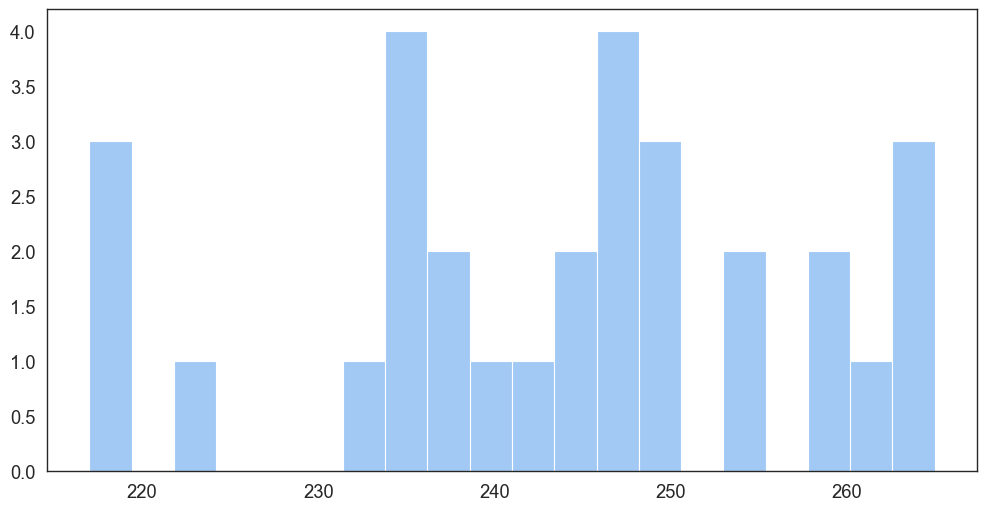

In [10]:
# erdos-renyi
p = real_density
edges = []
for s in range(30):
    G = nx.erdos_renyi_graph(n, p, seed=s)
    edges.append(len(G.edges()))
    fn = os.path.join(PATH_TO_TEXT_FILES, f'er_{s}.adj')
    nx.write_adjlist(G, fn)
plt.hist(edges, bins=20)
plt.show()

Using m = 5
{225}


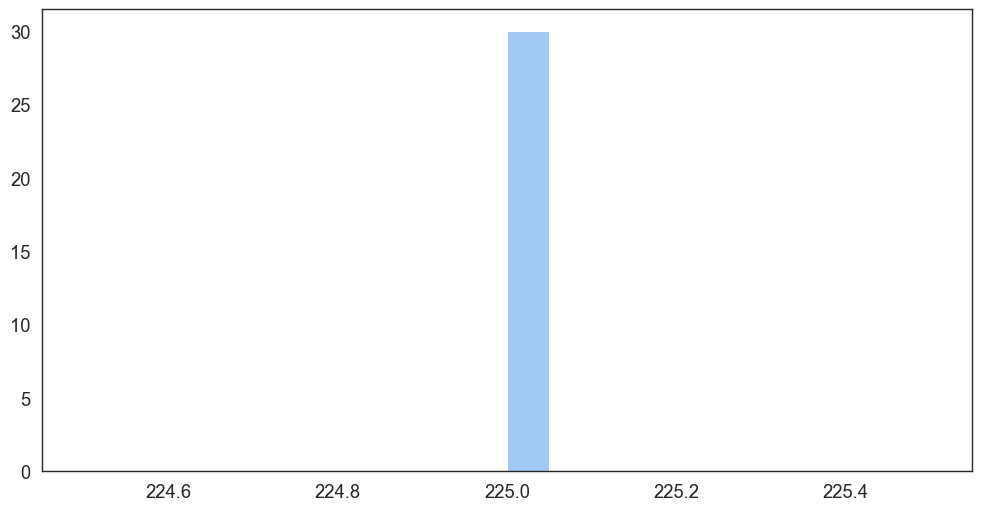

In [46]:
# barabasi-albert
n = 50
best_m = None 
best_diff = 1e6
for m in range(1, 8):
    G = nx.barabasi_albert_graph(n, m, seed=s)
    num_edges = len(G.edges())
    diff = np.abs(len(G.edges()) - exp_edges)
    if diff < best_diff:
        best_diff = diff 
        best_m = m 
print('Using m =', best_m)

edges = []
for s in range(30):
    G = nx.barabasi_albert_graph(n, best_m, seed=s)
    edges.append(len(G.edges()))
    fn = os.path.join(PATH_TO_TEXT_FILES, f'ba_{s}.adj')
    nx.write_adjlist(G, fn)
print(set(edges))
plt.hist(edges, bins=20)
plt.show()

In [18]:
# watts-strogatz 
for k in np.arange(4, 16, 2):
    for p in np.arange(0.05, 0.16, 0.05):
        for s in range(5):
            G = nx.watts_strogatz_graph(n, k, p, seed=s)
            assert len(G.edges()) == (n*k)/2

In [47]:
# fit k (number of neighbors)
best_k = None 
best_diff = 1e6
p = 0.01
for k in np.arange(8, 13, 2):
    G = nx.watts_strogatz_graph(n, k, p, seed=s)
    num_edges = len(G.edges())
    assert num_edges == (n*k)/2
    diff = np.abs(num_edges - exp_edges)
    print(k, diff)
    if diff < best_diff:
        best_diff = diff 
        best_k = k 
print('Using k =', best_k)

8 41.88159148556531
10 8.118408514434691
12 58.11840851443469
Using k = 10


best p =  0.15


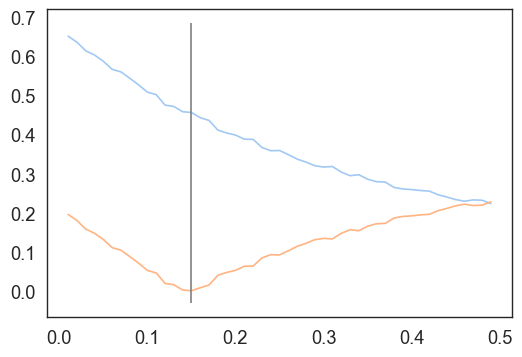

In [49]:
# fit p (rewiring probability)
best_p = None 
best_diff = 1e6
p_options = np.arange(0.01, 0.5, 0.01)
p_clustering = []
for p in p_options:
    clustering = []
    for s in range(30):
        G = nx.watts_strogatz_graph(n, best_k, p)
        clustering.append(nx.average_clustering(G))
    p_clustering.append(np.mean(clustering))
plt.figure(figsize=(6,4))
plt.plot(p_options, p_clustering)
diff = np.abs(p_clustering - real_mean.loc['Avg clustering coef']['mean'])
plt.plot(p_options, diff)
min_val = p_options[np.argmin(diff)]
best_p = min_val.round(3)
print('best p = ', best_p)
ymin, ymax = plt.ylim()
plt.vlines([min_val], ymin, ymax, color='grey')
plt.show()

In [ ]:
for s in range(30):
    G = nx.watts_strogatz_graph(n, best_k, best_p, seed=s)
    fn = os.path.join(PATH_TO_TEXT_FILES, f'ws_{s}.adj')
    nx.write_adjlist(G, fn)

In [ ]:
# summarize network models
min_seed = 0
max_seed = 29
for model in ['er', 'ba', 'ws']: 
    list_of_G, t1, t2 = load_list_of_graphs(model, min_seed, max_seed+1, directed=False, include_ts=True)
    print(f'{model}: found {len(list_of_G)} graphs ({t1} TO {t2})')
    summarize_network_metrics(list_of_G, None, None, model, demos=False)
    print()

er: found 30 graphs (Mon Aug 26 15:10:24 2024 TO Mon Aug 26 15:10:24 2024)
Saved network metrics to er/network_metrics.csv

ba: found 30 graphs (Mon Aug 26 15:23:15 2024 TO Mon Aug 26 15:23:15 2024)
Saved network metrics to ba/network_metrics.csv

ws: found 30 graphs (Mon Aug 26 15:35:46 2024 TO Mon Aug 26 15:35:46 2024)
Saved network metrics to ws/network_metrics.csv



In [ ]:
network_df = pd.read_csv(f'stats/real/network_metrics.csv')
metric_dfs = [network_df]
homophily_dfs = []

# load network metrics and homophily for generated networks
model = 'gpt-3.5-turbo'
for method in ['global', 'local', 'sequential']: # , 'iterative']:
    metric_dfs.append(pd.read_csv(f'stats/{method}_{model}/network_metrics.csv'))

for model in ['er', 'ba', 'ws']:
    metric_dfs.append(pd.read_csv(f'stats/{model}/network_metrics.csv'))

network_df = pd.concat(metric_dfs)
print(network_df.groupby('save_name').size())

save_name
ba                          4710
er                          4710
global_gpt-3.5-turbo        4710
local_gpt-3.5-turbo         4710
real                        1097
sequential_gpt-3.5-turbo    4710
ws                          4710
dtype: int64


In [ ]:
results = []
for method in ['er', 'ba', 'ws', 'global', 'local', 'sequential']:
    if len(method) > 2:
        save_name = f'{method}_gpt-3.5-turbo'
    else:
        save_name = method
    for metric in ['density', 'avg_clustering_coef', 'prop_nodes_lcc', 'avg_shortest_path', 'modularity', 'degree_centrality']:
        mean_diff, mean_diff_norm, ks_stat, ks_pval = compare_network_metrics(network_df, metric, save_name)
        results.append({'method': method, 'metric': metric, 'mean_diff': mean_diff, 'mean_diff_norm': mean_diff_norm,
                        'ks_stat': ks_stat, 'ks_pval': ks_pval})
df = pd.DataFrame(results)
df.round(3)

Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 347 real and 1500 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 347 real and 1500 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 347 real and 1500 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 347 real and 1500 generated values
Found 8 real and 30 generated values
Found 8 real and 30 generated values
Found 8 real and 30 ge

,method,metric,mean_diff,mean_diff_norm,ks_stat,ks_pval
0,er,density,0.002,0.013,0.625,0.007
1,er,avg_clustering_coef,0.257,2.286,1.000,0.000
2,er,prop_nodes_lcc,0.010,0.378,0.125,1.000
3,er,avg_shortest_path,0.145,1.156,0.750,0.000
4,er,modularity,0.149,1.149,0.750,0.000
5,er,degree_centrality,0.023,0.154,0.465,0.000
6,ba,density,0.014,0.113,0.625,0.007
7,ba,avg_clustering_coef,0.153,1.363,0.750,0.000
8,ba,prop_nodes_lcc,0.010,0.378,0.125,1.000
9,ba,avg_shortest_path,0.135,1.081,0.750,0.000
